In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# filenames and locations
working_dir = '/Users/ptaufalele/Documents/Sites/COVID-19'
data_folder = '/csse_covid_19_data'
tseries_folder = '/csse_covid_19_time_series'
tseries_confirmed = '/time_series_covid19_confirmed_global.csv'

In [9]:
tseries_df = pd.read_csv(working_dir+data_folder+tseries_folder+tseries_confirmed)

In [25]:
tseries_df.head(5)

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,24,40,40,74,84,94,110,110,120,170
1,NaN,Albania,0,0,0,0,0,0,0,0,...,76,89,104,123,146,174,186,197,212,223
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,139,201,230,264,302,367,409,454,511,584
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,88,113,133,164,188,224,267,308,334,370
4,NaN,Angola,0,0,0,0,0,0,0,0,...,2,2,3,3,3,4,4,5,7,7


In [20]:
# search by either province/state
#series_df.loc[tseries_df['Province/State'] == 'Texas']

# search by country/region
tseries_df.loc[tseries_df['Country/Region'] == 'United States']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20


In [23]:
tseries_df = tseries_df.drop(columns = ['Lat', 'Long'])

In [27]:
tseries_df.head(5)

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,24,40,40,74,84,94,110,110,120,170
1,NaN,Albania,0,0,0,0,0,0,0,0,...,76,89,104,123,146,174,186,197,212,223
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,139,201,230,264,302,367,409,454,511,584
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,88,113,133,164,188,224,267,308,334,370
4,NaN,Angola,0,0,0,0,0,0,0,0,...,2,2,3,3,3,4,4,5,7,7


In [31]:
afghan = tseries_df.loc[tseries_df['Country/Region'] == 'Afghanistan']

In [32]:
afghan

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,24,40,40,74,84,94,110,110,120,170


# I want to combine the province/state or country/region column

If there row has a province/state, then i want that to be the rowname
If not, then i want the country/region to be the rowname

In [67]:
type(afghan['Province/State'])

pandas.core.series.Series

In [74]:
pd.isnull(afghan.iloc[0]['Province/State'])

True

In [87]:
def defineRegion(row):
    if pd.isnull(row['Province/State']):
        return row['Country/Region'];
    else :
        return row['Province/State']

In [90]:
tseries_df['Territory'] = tseries_df.apply(defineRegion, axis = 1)

In [159]:
tseries_df.head(5)

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
Territory,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,24,40,40,74,84,94,110,110,120,170
Albania,NaN,Albania,0,0,0,0,0,0,0,0,...,76,89,104,123,146,174,186,197,212,223
Algeria,NaN,Algeria,0,0,0,0,0,0,0,0,...,139,201,230,264,302,367,409,454,511,584
Andorra,NaN,Andorra,0,0,0,0,0,0,0,0,...,88,113,133,164,188,224,267,308,334,370
Angola,NaN,Angola,0,0,0,0,0,0,0,0,...,2,2,3,3,3,4,4,5,7,7


In [94]:
tseries_df = tseries_df.set_index('Territory')

In [158]:
tseries_df.head(5)

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
Territory,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,24,40,40,74,84,94,110,110,120,170
Albania,NaN,Albania,0,0,0,0,0,0,0,0,...,76,89,104,123,146,174,186,197,212,223
Algeria,NaN,Algeria,0,0,0,0,0,0,0,0,...,139,201,230,264,302,367,409,454,511,584
Andorra,NaN,Andorra,0,0,0,0,0,0,0,0,...,88,113,133,164,188,224,267,308,334,370
Angola,NaN,Angola,0,0,0,0,0,0,0,0,...,2,2,3,3,3,4,4,5,7,7


In [218]:
fuck = tseries_df.loc[['US', 'Spain', 'Italy', 'Georgia'], '1/22/20':]

In [219]:
fuck

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
Territory,,,,,,,,,,,,,,,,,,,,,
US,1,1,2,2,5,5,5,5,5,7,...,25489,33276,43847,53740,65778,83836,101657,121478,140886,161807
Spain,0,0,0,0,0,0,0,0,0,0,...,25374,28768,35136,39885,49515,57786,65719,73235,80110,87956
Italy,0,0,0,0,0,0,0,0,0,2,...,53578,59138,63927,69176,74386,80589,86498,92472,97689,101739
Georgia,0,0,0,0,0,0,0,0,0,0,...,49,54,61,70,75,79,83,90,91,103


In [220]:
n_dates = len(fuck.iloc[0])

In [221]:
n_dates

69

In [222]:
dateList = pd.date_range(pd.datetime(2020,1,22), periods = n_dates).tolist()

In [223]:
fuck = fuck.transpose()

In [224]:
fuck['Dates'] = dateList;

In [225]:
fuck = fuck.set_index('Dates')

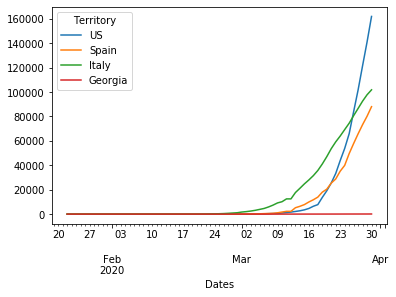

In [227]:
fuck.plot()

In [286]:
countries = ['US', 'Georgia', 'Korea, South', 'Malaysia']

In [287]:
fuck = tseries_df.loc[countries, '3/1/20':]
n_dates = len(fuck.iloc[0])
n_dates
dateList = pd.date_range(pd.datetime(2020,3,1), periods = n_dates).tolist()
fuck = fuck.transpose()
fuck['Dates'] = dateList;
fuck = fuck.set_index('Dates')

In [288]:
plt.rcParams['figure.figsize'] = [15,10]

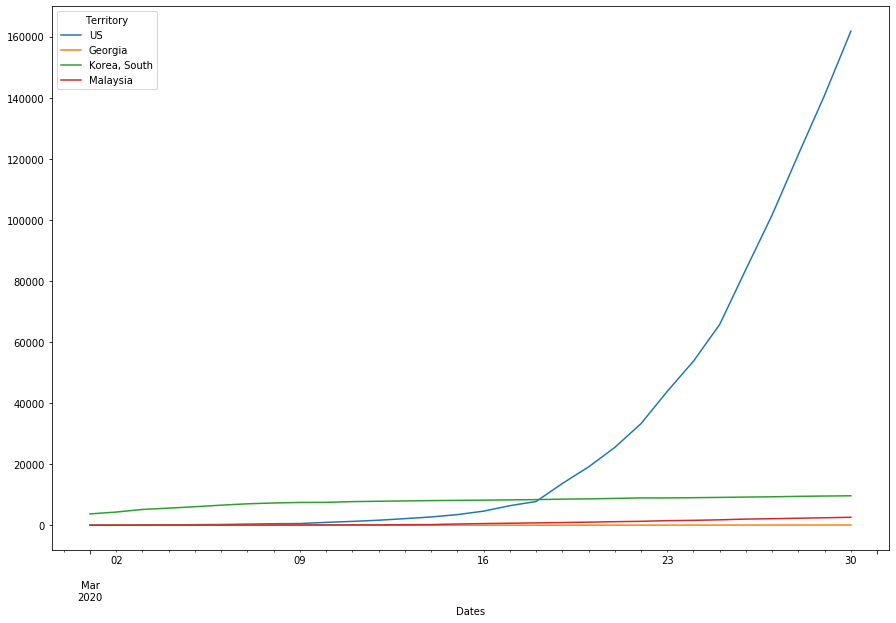

In [289]:
fuck.plot()